In [1]:
#reload source files automatically
%load_ext autoreload
%autoreload 2

In [3]:
import sklearn
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import sklearn
import sklearn.neighbors
import sklearn.metrics
from __future__ import print_function

from lime_time_series import *

In [4]:
# read dataset
train = pd.read_csv('time_series/Trace_TRAIN', header=None)
test = pd.read_csv('time_series/Trace_TEST', header=None)
Y_columns = [0]
Y_train = train[Y_columns]
X_train = train.drop(Y_columns, axis=1)
Y_test = test[Y_columns]
X_test = test.drop(Y_columns, axis=1)

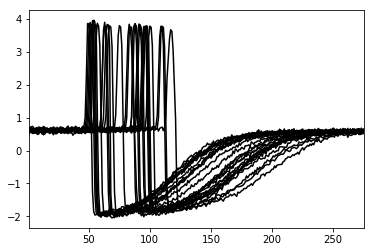

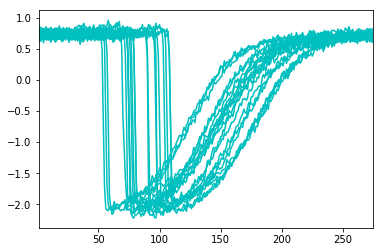

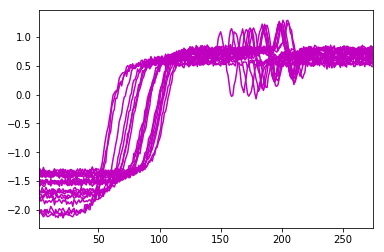

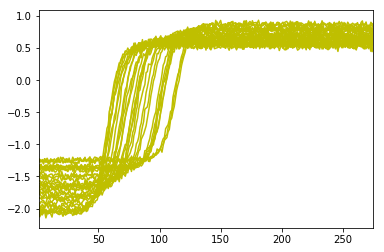

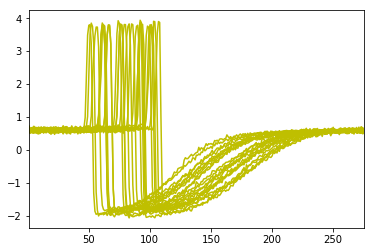

In [5]:
train[train[0]==1].transpose()[1:].plot(legend=False, color='k')
plt.show()
train[train[0]==2].transpose()[1:].plot(legend=False, color='c')
plt.show()
train[train[0]==3].transpose()[1:].plot(legend=False, color='m')
plt.show()
train[train[0]==4].transpose()[1:].plot(legend=False, color='y')
plt.show()
test[test[0]==1].transpose()[1:].plot(legend=False, color='y')
plt.show()

In [6]:
def DTWDistance(s1, s2):
    DTW={}

    for i in range(len(s1)):
        DTW[(i, -1)] = float('inf')
    for i in range(len(s2)):
        DTW[(-1, i)] = float('inf')
    DTW[(-1, -1)] = 0

    for i in range(len(s1)):
        for j in range(len(s2)):
            dist= (s1[i]-s2[j])**2
            DTW[(i, j)] = dist + min(DTW[(i-1, j)],DTW[(i, j-1)], DTW[(i-1, j-1)])

    return math.sqrt(DTW[len(s1)-1, len(s2)-1])

In [7]:
def DTWDistance_windowed(s1, s2):
    DTW={}

    w = max(10, abs(len(s1)-len(s2)))

    for i in range(-1,len(s1)):
        for j in range(-1,len(s2)):
            DTW[(i, j)] = float('inf')
    DTW[(-1, -1)] = 0

    for i in range(len(s1)):
        for j in range(max(0, i-w), min(len(s2), i+w)):
            dist= (s1[i]-s2[j])**2
            DTW[(i, j)] = dist + min(DTW[(i-1, j)],DTW[(i, j-1)], DTW[(i-1, j-1)])

    return math.sqrt(DTW[len(s1)-1, len(s2)-1])

In [8]:
kNN = sklearn.neighbors.KNeighborsClassifier(metric=DTWDistance_windowed)
kNN.fit(X_train, Y_train.values.ravel())

KNeighborsClassifier(algorithm='auto', leaf_size=30,
           metric=<function DTWDistance_windowed at 0x0000026771D29400>,
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [9]:
pred = kNN.predict(X_test[0:3])

In [10]:
pred

array([3, 1, 3], dtype=int64)

In [11]:
sklearn.metrics.accuracy_score(Y_test[0:3].values.ravel(), pred)

1.0

In [14]:
explainer = LimeTimeSeriesExplainer()

In [15]:
idx = 15
print(X_test.shape)
exp = explainer.explain_instance(X_test.iloc[[idx]], kNN.predict_proba, num_features=1, num_samples=5)
print('Series id: %d' % idx)
print('Probabilities: ', kNN.predict_proba([X_test[idx]]))
print('True class: %s' % Y_test[idx])

(100, 275)
(1, 275)
                                                   0
0         1       2       3       4       5      ...


TypeError: 'numpy.int64' object is not iterable

In [45]:
exp.as_list()

NameError: name 'exp' is not defined